# Import Library & Data

In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
import os 
os.chdir(r"C:\Users\Dell\Desktop\Machine Learning\exam\exaam_pca_nb_svm") 

In [3]:
# importing or loading the dataset 
Data = pd.read_csv(r"Wine.csv")

Data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Taking specific column for Analysis

In [4]:
Data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [5]:
numeric_predictors=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
X_train = Data[numeric_predictors]
y_train = Data['Customer_Segment']

In [6]:
X_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Q1. Compute and plot those feature which are related to each other?

In [7]:
Correlation=X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if (x > 0.7) |  (x < -0.7) else '')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

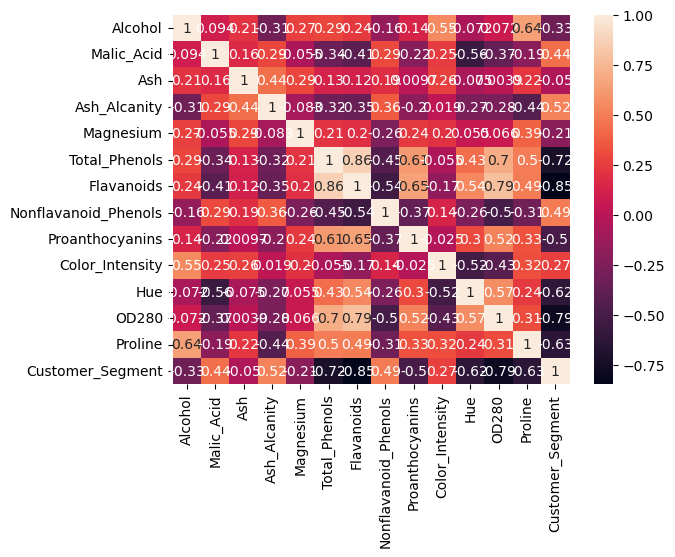

In [8]:
sns.heatmap(Data.corr(), annot = True)

* here we can conclude that it is multi-collinearity

### Q2 What are the optimum number of principal components in PCA?

### PCA is effected by scale so you need to scale the features in the data before applying PCA. 

* You can transform the data onto unit scale (mean = 0 and variance = 1) 

In [9]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() # mean 0 & std=1
  
X_train_1 = sc.fit_transform(X_train)  # Fit to data, then transform it.

### Mean

In [10]:
X_train_1.mean(axis=0)

array([-8.38280756e-16, -1.19754394e-16, -8.37033314e-16, -3.99181312e-17,
       -3.99181312e-17,  0.00000000e+00, -3.99181312e-16,  3.59263181e-16,
       -1.19754394e-16,  2.49488320e-17,  1.99590656e-16,  3.19345050e-16,
       -1.59672525e-16])

### Standard Deviation

In [11]:
X_train_1.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
X_train.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [13]:
X_train_1

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# No. of variable in original dataset

In [14]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
model = PCA(n_components = 3) # we are specifying we want 3 PCA
  
principalComponents= model.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance
* The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

* This is important as while you can convert high dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 

In [15]:
import numpy as np
list(np.round(principalComponents.explained_variance_,2))   # eigen values  >= 1 

[4.73, 2.51, 1.45]

In [16]:
(4.73+2.51+1.45)/13

0.6684615384615384

In [17]:
list(np.round(principalComponents.explained_variance_ratio_,2))    # >= 50%

[0.36, 0.19, 0.11]

In [18]:
0.36+ 0.19+0.11

0.66

* You can see that the first principal component contains 36% of the variance 

* The second principal component contains 19% of the variance & third  PC contain 11%.

* Together, the three components contain 66% of the information.

principalComponents.mean_

principalComponents.get_covariance()

In [19]:
X_train_1 ### scaled dataset

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Beta Values or Eigen Vector 
Z1 = Beta1*x1+Beta2*X2 + beta3*X3 + ..... + beta13*X13


In [20]:
principalComponents.components_   ##  BETA VALUES  Z1 , Z2 & Z3 

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

### Renaming the Columns  

* Prediction for data to get data reduction 


In [21]:
X_train_1  # scaled data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [22]:
transformed_data=principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)
transformed_data

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [23]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (178, 13)
transformed shape: (178, 3)


In [24]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2', 'Data PC3'])
principalDf.head()

,Data PC1,Data PC2,Data PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


# To check the Principal Component is uncorrelated / independent

In [25]:
Correlation=round(principalDf.corr(),3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Data PC1,Data PC2,Data PC3
Data PC1,1.000000,-0.000000,-0.000000
Data PC2,-0.000000,1.000000,0.000000
Data PC3,-0.000000,0.000000,1.000000


* After applying PCA we can see there is no collinearity left in the model 

## Identify variable is combining together in Which PCA 

In [26]:
numeric_predictors_1=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
scaled_train=pd.DataFrame(X_train_1,columns=numeric_predictors_1)
scaled_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [27]:
final_data=pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Data PC1,Data PC2,Data PC3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,-0.165739
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,-2.026457
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0.982819
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,-0.176192
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,2.026688


In [28]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:13,13:])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2,Data PC3
Alcohol,31.300000,76.400000,24.900000
Malic_Acid,53.200000,35.500000,10.700000
Ash,0.400000,49.900000,75.300000
Ash_Alcanity,51.900000,1.700000,73.600000
Magnesium,30.800000,47.300000,15.700000
Total_Phenols,85.600000,10.300000,17.600000
Flavanoids,91.700000,0.500000,18.100000
Nonflavanoid_Phenols,64.800000,4.500000,20.500000
Proanthocyanins,68.000000,6.200000,18.000000
Color_Intensity,19.200000,83.700000,16.500000


* Data PC1 =  'Malic_Acid', Total_Phenols, Flavanoids,Nonflavanoid_Phenols, Proanthocyanins, Hue,OD280,Proline
* Data PC2 = Alcohol,Color_Intensity,Magnesium
* Data PC3 = Ash, Ash_Alcanity	

# Submission to Business

#### Coefficient Values 

In [29]:
principalComponents.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [30]:
principalDf

,Data PC1,Data PC2,Data PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# Converting Unsupervised to Supervised -- Combining PC's & Y Variable

In [31]:
train=pd.concat([principalDf,y_train],axis=1)
train

,Data PC1,Data PC2,Data PC3,Customer_Segment
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


### Q3 Build a KNN classifier considering optimal number of principal components and value of K and state its score.

# Step 3 : Data Partition

In [32]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = train.drop(['Customer_Segment'],axis=1)
train_y = train['Customer_Segment']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=1111)

# Step 5 : Model Building 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=8)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [35]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Data PC1,Data PC2,Data PC3,Customer_Segment
66,2.248507,1.884592,-2.031840,2
63,2.050262,1.925033,-0.007369,2
36,1.384862,-0.658640,0.458439,1
111,-0.278703,1.930568,0.078671,2
96,-0.543953,0.368927,1.308896,2


In [36]:
train['Predicted']=model.predict(X_train)
train.head()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Data PC1,Data PC2,Data PC3,Customer_Segment,Predicted
66,2.248507,1.884592,-2.031840,2,2
63,2.050262,1.925033,-0.007369,2,2
36,1.384862,-0.658640,0.458439,1,1
111,-0.278703,1.930568,0.078671,2,2
96,-0.543953,0.368927,1.308896,2,2


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Customer_Segment'],train['Predicted'])
print(confusion_matrix)

[[42  0  0]
 [ 1 48  0]
 [ 0  0 33]]


In [38]:
Accuracy_Train=((41+48+33)/(124)*100)
print(Accuracy_Train)

98.38709677419355


In [39]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Predicted']))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        42
           2       1.00      0.98      0.99        49
           3       1.00      1.00      1.00        33

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124



* we got 99% Accuracy in the model

In [40]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Data PC1,Data PC2,Data PC3,Customer_Segment
137,-3.936463,-0.659687,1.712215,3
173,-3.370524,-2.216289,-0.342570,3
92,-1.932556,1.559495,-0.089275,2
108,0.082536,2.306235,-0.463575,2
120,0.739622,1.408957,1.125345,2


In [41]:
test['Predicted']=model.predict(X_test)
test.head()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Data PC1,Data PC2,Data PC3,Customer_Segment,Predicted
137,-3.936463,-0.659687,1.712215,3,3
173,-3.370524,-2.216289,-0.342570,3,3
92,-1.932556,1.559495,-0.089275,2,2
108,0.082536,2.306235,-0.463575,2,2
120,0.739622,1.408957,1.125345,2,2


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Customer_Segment'],test['Predicted'])
print(confusion_matrix)

[[17  0  0]
 [ 2 19  1]
 [ 0  0 15]]


In [43]:
Accuracy_test=((17+19+15)/(54)*100)
Accuracy_test

94.44444444444444

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test['Customer_Segment'], test['Predicted']))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       1.00      0.86      0.93        22
           3       0.94      1.00      0.97        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



* we got 94% test Accuracy in the model

# Cross Validation Method  - Random concept

* To identify the best value of K

In [45]:
from sklearn.metrics import accuracy_score
for K in range(50,75):
    K_value = K+1
    model2 = KNeighborsClassifier(n_neighbors = K_value)
    model2.fit(X_train, y_train) 
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ", 
          round(accuracy_score(y_train,y_pred_Train)*100,0), "      ","Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 51


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 52
Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 53
Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 54
Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 55
Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 56


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 57
Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 58
Train Accuracy is  98.0        Test Accuracy is  93.0 % for K-Value: 59
Train Accuracy is  97.0        Test Accuracy is  93.0 % for K-Value: 60
Train Accuracy is  97.0        Test Accuracy is  93.0 % for K-Value: 61
Train Accuracy is  97.0        Test Accuracy is  93.0 % for K-Value: 62
Train Accuracy is  97.0        Test Accuracy is  93.0 % for K-Value: 63
Train Accuracy is  97.0        Test Accuracy is  93.0 % for K-Value: 64
Train Accuracy is  95.0        Test Accuracy is  93.0 % for K-Value: 65
Train Accuracy is  94.0        Test Accuracy is  94.0 % for K-Value: 66
Train Accuracy is  94.0        Test Accuracy is  94.0 % for K-Value: 67
Train Accuracy is  91.0        Test Accuracy is  93.0 % for K-Value: 68
Train Accuracy is  91.0        Test Accuracy is  91.0 % for K-Value: 69
Train Accuracy is  90.0        Test Accuracy is  91.0 % for K-Va

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Optimal K-Value for KNN model is 69
Train Accuracy is  91.0        Test Accuracy is  91.0 % for K-Value: 69


In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 100)}


knn2 = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn2,
                        param_grid, # 2,3,4,5,6,7,8
                        cv=10,
                        verbose=1)
knn_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=1)

In [47]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 24}

In [48]:
knn_gscv.best_score_


0.9916666666666666

### Q4. Build a SVM Classifier and tune the hyperparameters to get the optimum model.

In [49]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [50]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
from sklearn.svm import SVC  # supervised learning methods used for classification, regression 
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

import seaborn as sn
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from PIL import  Image
import seaborn as sns#visualization
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

#  Identify the outliers and & treatment of outliers 

<AxesSubplot:>

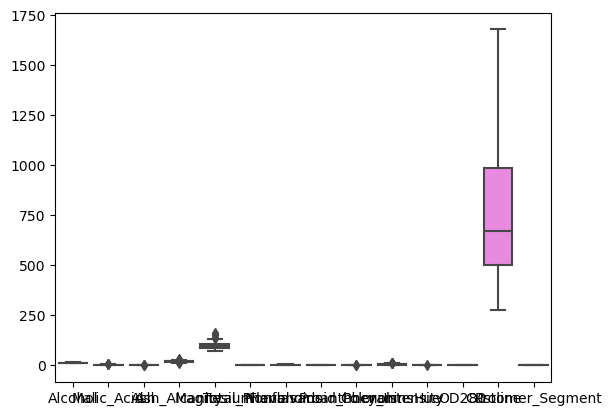

In [51]:
sns.boxplot(data = Data)

In [52]:
for i in  Data  :
    q1 = Data[i].quantile(0.25)
    q3 =  Data  [i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    for j in  Data  [i]:
        if j > upper_limit:
             Data  [i]=np.where( Data  [i] > upper_limit,upper_limit, Data  [i]) # upper limit
        else:
             Data  [i]=np.where( Data  [i] < lower_limit,lower_limit, Data  [i]) # lower limit


<AxesSubplot:>

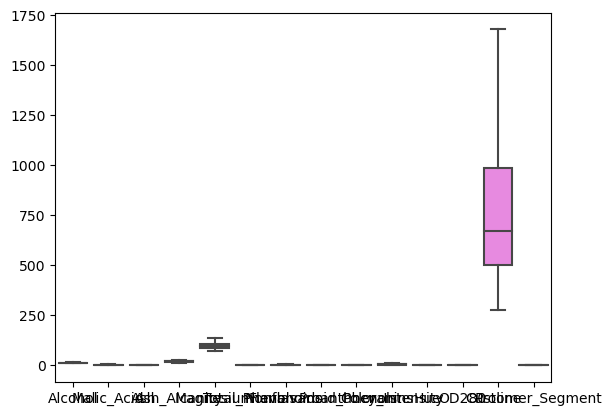

In [53]:
sns.boxplot(data = Data)

* so here we removed all the outliers from the model by replacing them with upper limit and lower limit

In [54]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
Train_x = Data.drop(['Customer_Segment'],axis=1) #drop the y column from X_train 
Train_y = Data['Customer_Segment']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(Train_x, Train_y, test_size=0.3,random_state=7899)



# Manual Model 

In [55]:
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
model = SVC(kernel="linear")  # if we use linear then only we get support_vector
model.fit(X_train, y_train) #Variable = fgood ( defaulter =1 , non-defaulter = 0)

SVC(kernel='linear')

In [56]:
model.support_vectors_        #####this are support vector

array([[1.30500e+01, 2.05000e+00, 3.07875e+00, 2.50000e+01, 1.24000e+02,
        2.63000e+00, 2.68000e+00, 4.70000e-01, 1.92000e+00, 3.58000e+00,
        1.13000e+00, 3.20000e+00, 8.30000e+02],
       [1.32400e+01, 3.98000e+00, 2.29000e+00, 1.75000e+01, 1.03000e+02,
        2.64000e+00, 2.63000e+00, 3.20000e-01, 1.66000e+00, 4.36000e+00,
        8.20000e-01, 3.00000e+00, 6.80000e+02],
       [1.33400e+01, 9.40000e-01, 2.36000e+00, 1.70000e+01, 1.10000e+02,
        2.53000e+00, 1.30000e+00, 5.50000e-01, 4.20000e-01, 3.17000e+00,
        1.02000e+00, 1.93000e+00, 7.50000e+02],
       [1.15600e+01, 2.05000e+00, 3.07875e+00, 2.79500e+01, 1.19000e+02,
        3.18000e+00, 5.08000e+00, 4.70000e-01, 1.87000e+00, 6.00000e+00,
        9.30000e-01, 3.69000e+00, 4.65000e+02],
       [1.22900e+01, 1.61000e+00, 2.21000e+00, 2.04000e+01, 1.03000e+02,
        1.10000e+00, 1.02000e+00, 3.70000e-01, 1.46000e+00, 3.05000e+00,
        9.06000e-01, 1.82000e+00, 8.70000e+02],
       [1.23300e+01, 1.10000e+

* this are the Support Vectors 

In [57]:
np.round(model.coef_)                 ######### Coefficient value   ( beta's value)

array([[ 1.,  1.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  1.,  0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.],
       [-0.,  0., -0.,  0., -0.,  0.,  1.,  0.,  1., -1.,  0.,  0.,  0.]])

In [58]:
np.round(model.intercept_)   ###### bias  ( intercept`)

array([-18.,  -3.,   8.])

# Step 6 : Predictions on Train Dataset

In [59]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0


In [60]:
train['Prediction']=model.predict(X_train)
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Prediction
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0,1.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0,1.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0,2.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0,1.0


# Step 7 : Model Performance Metrics

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Prediction'],train['Customer_Segment'])
print(confusion_matrix)

[[42  0  0]
 [ 0 50  0]
 [ 0  0 32]]


In [62]:
Accuracy_Train=((42+50+32)/(124)*100)
print(Accuracy_Train)

100.0


after applying confusion matrix we get 100% accuracy with overfit on train data

In [63]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Prediction']))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        42
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



# Predictions on Test Dataset

In [64]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,3.0
48,14.10,2.0200,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,1.0
103,11.82,1.7200,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,2.0
78,12.33,0.9900,1.95,14.8,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,2.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0


In [65]:
test['Prediction']=model.predict(X_test)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Prediction
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,3.0,3.0
48,14.10,2.0200,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,1.0,1.0
103,11.82,1.7200,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,2.0,2.0
78,12.33,0.9900,1.95,14.8,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,2.0,2.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0,1.0


# Model Performance Metrics on Test data 

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix( test['Prediction'],test['Customer_Segment'])
print(confusion_matrix)

[[17  3  2]
 [ 0 17  1]
 [ 0  1 13]]


In [67]:
Accuracy_test=((17+17+13)/(54)*100)
Accuracy_test

87.03703703703704

after applying confusion matrix on test data we get 87% accuracy

In [68]:
print(classification_report(test['Customer_Segment'], test['Prediction']))

              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87        17
         2.0       0.94      0.81      0.87        21
         3.0       0.93      0.81      0.87        16

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.89      0.87      0.87        54



# HyperTuning Parameter

In [69]:
# Define Model parameters to tune
model_parameters = {
        'kernel':['linear'], # calculation
        'C':[1, 10], #cost complexity or penalty
        'gamma': [0.0001]
    }

In [70]:
# Gridsearch the parameters to find the best parameters.
model = SVC(probability=True)  # Support vector classifier

gscv = GridSearchCV(estimator=model,
                    param_grid=model_parameters,
                    cv=5,  # times
                    verbose=1,
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.0001], 'kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [71]:
print('The best parameter are -', gscv.best_params_)


The best parameter are - {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [72]:
# Re-fit the model with the best parameters
final_model = SVC(**gscv.best_params_)
final_model.fit(X_train, y_train)


SVC(C=1, gamma=0.0001, kernel='linear')

# Prediction Test and Train Data

In [73]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0


In [74]:
train['Prediction']=final_model.predict(X_train)
train.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Prediction
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0,1.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0,1.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0,2.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0,1.0


In [75]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Prediction']))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        42
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [76]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,3.0
48,14.10,2.0200,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,1.0
103,11.82,1.7200,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,2.0
78,12.33,0.9900,1.95,14.8,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,2.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0


In [77]:
test['Prediction']=final_model.predict(X_test)
test.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Prediction
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,3.0,3.0
48,14.10,2.0200,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,1.0,1.0
103,11.82,1.7200,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,2.0,2.0
78,12.33,0.9900,1.95,14.8,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,2.0,2.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0,1.0


In [78]:
from sklearn.metrics import classification_report
print(classification_report(test['Customer_Segment'], test['Prediction']))


              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87        17
         2.0       0.94      0.81      0.87        21
         3.0       0.93      0.81      0.87        16

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.89      0.87      0.87        54



* so here we saw that after hyper tuning we get 100% accuracy on train data and
* so here we saw that after hyper tuning we get 87% accuracy on test data

### q5. Build a Naive Bayes Classifier and comment about its accuracy. 

# Step 5 :- Model Building

In [79]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
output = gnb.fit(X_train, y_train)
#gnb_predictions = gnb.predict(X_test)

# Step 6 : Predictions on Train Dataset

In [80]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0


In [81]:
train['Predicted']=output.predict_proba(X_train)[:,1]  # answer in terms of probability
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Predicted
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0,1.220428e-21
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0,2.325694e-03
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0,2.000119e-04
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0,9.997621e-01
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0,2.211150e-07


In [82]:
train['Predicted2']=output.predict(X_train)  # answer in terms of probability
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Predicted,Predicted2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0,1.220428e-21,1.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,1.0,2.325694e-03,1.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,1.0,2.000119e-04,1.0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,2.0,9.997621e-01,2.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0,1.0,2.211150e-07,1.0


# Step 7 : Model Performance Metrics

In [83]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted2'], train['Customer_Segment'])
matrix

array([[41,  0,  0],
       [ 1, 49,  0],
       [ 0,  1, 32]], dtype=int64)

In [84]:
Accuracy_Train=((41+49+32)/(124)*100)
print(Accuracy_Train)

98.38709677419355


In [85]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'],train['Predicted2']))

              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99        42
         2.0       0.98      0.98      0.98        50
         3.0       0.97      1.00      0.98        32

    accuracy                           0.98       124
   macro avg       0.98      0.99      0.98       124
weighted avg       0.98      0.98      0.98       124



# Step 8 : Predictions on Test Dataset

In [86]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,3.0
48,14.10,2.0200,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,1.0
103,11.82,1.7200,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,2.0
78,12.33,0.9900,1.95,14.8,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,2.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0


In [87]:
test['Predicted2']=output.predict(X_test)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Predicted2
137,12.53,5.3025,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,3.0,3.0
48,14.10,2.0200,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,1.0,1.0
103,11.82,1.7200,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,2.0,2.0
78,12.33,0.9900,1.95,14.8,135.5,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,2.0,2.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0,1.0


# Step 9 : Model Performance Metrics on Test data 

In [88]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted2'],test['Customer_Segment'])
print(matrix)

[[17  1  0]
 [ 0 20  0]
 [ 0  0 16]]


In [89]:
Accuracy_test=((17+20+16)/(54)*100)
Accuracy_test

98.14814814814815

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test['Customer_Segment'],test['Predicted2']))

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        17
         2.0       1.00      0.95      0.98        21
         3.0       1.00      1.00      1.00        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Q6. Compare all of the models and justify your choice about the optimum mode

* 1) KNN 
        * Train Accuracy = 99%
        * Test Accuracy = 94%
        * Optimal K-Value for KNN model is 69. Train Accuracy is 91.0 Test Accuracy is 91.0 % *
* 2) SVM
        * Train Accuracy = 100%
        * Test Accuracy = 87%
        * The best parameter are - {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
* 3) NaiveBayes
        * Train Accuracy = 98%
        * Test Accuracy = 98%
* 3 is the best optimum PCA component     
* here we can conclude that it is multi-collinearity       
* Here we conclude that KNN is the best model for Wine Dataset as we get 91% accuracy on train and test       